# Project - Web Scrapping & Data Preparation of News Articles Using KMeans Clustering

In [1]:
import pandas as pd

## Scraped data from Opindia News Website

In [2]:
import requests
from bs4 import BeautifulSoup
url = "https://www.opindia.com/latest-news/"
data = requests.get(url)

In [3]:
data

<Response [200]>

In [4]:
soup = BeautifulSoup(data.content,"html.parser")

### Created function for fetching article with URL

In [5]:
def fetch_article(url):
    data = requests.get(url)
    soup = BeautifulSoup(data.content,"html.parser")
    articles = []
    for i in soup.find_all("h3",class_ = ["entry-title td-module-title"]):
        articles.append(i.find('a')['title'])     
    return articles

### Created URL list

In [6]:
urllist = []
for i in range(2,21,1):
    url = "https://www.opindia.com/latest-news/page/" + str(i) + "/"
    urllist.append(url)

### By fetch articles function fetched the data

In [7]:
all_articles = []
for i in urllist:
    all_articles.extend(fetch_article(i))

In [8]:
all_articles[1:200]

['Scratch a ‘vivadit dhancha’, find a Mandir: A list of Hindu temples destroyed over centuries of Islamic rule where masjids and dargahs stand now',
 'Two different Ideas of India: ‘Bharat Mata Ki Jai’ chants in Bangkok and Rahul Gandhi’s argument that India doesn’t exist as a ‘nation’',
 'AIMIM leader Asaduddin Owaisi provokes Muslims against court-ordered proceedings after Shivling discovered inside the disputed Gyanvapi structure',
 'Srinagar Mayor hails Aurangzeb, prays for mercy and blessings after Devendra Fadnavis’ ‘kutta bhi nahi peshab karega’ speech for Mughal tyrant’s grave',
 'Ghazwa-e-Hind: The Islamic prophecy that explains why the likes of Owaisi feel proud of Mughal tyrant Aurangzeb and his anti-Hindu deeds',
 'Rahul Bhat was anything but a ‘Sanghi’: How his murder shows the ‘political’ problem of Kashmir is nothing but a cover for Jihad',
 'Two different Ideas of India: ‘Bharat Mata Ki Jai’ chants in Bangkok and Rahul Gandhi’s argument that India doesn’t exist as a ‘na

## Tokenization and Stemming

In [9]:
p_art=[]
for i in all_articles:
    q=i.upper()
    import re
    q=re.sub('[^A-Z0-9 ]','',q)
    from nltk.stem import PorterStemmer
    tk_q=q.split(" ")
    sent=""
    for j in tk_q:
        ps=PorterStemmer()
        sent=sent+" "+ps.stem(j).upper()
    p_art.append(sent)
    

In [10]:
p_art[1:200]

[' SCRATCH A VIVADIT DHANCHA FIND A MANDIR A LIST OF HINDU TEMPL DESTROY OVER CENTURI OF ISLAM RULE WHERE MASJID AND DARGAH STAND NOW',
 ' TWO DIFFER IDEA OF INDIA BHARAT MATA KI JAI CHANT IN BANGKOK AND RAHUL GANDHI ARGUMENT THAT INDIA DOESNT EXIST AS A NATION',
 ' AIMIM LEADER ASADUDDIN OWAISI PROVOK MUSLIM AGAINST COURTORD PROCEED AFTER SHIVL DISCOV INSID THE DISPUT GYANVAPI STRUCTUR',
 ' SRINAGAR MAYOR HAIL AURANGZEB PRAY FOR MERCI AND BLESS AFTER DEVENDRA FADNAVI KUTTA BHI NAHI PESHAB KAREGA SPEECH FOR MUGHAL TYRANT GRAVE',
 ' GHAZWAEHIND THE ISLAM PROPHECI THAT EXPLAIN WHI THE LIKE OF OWAISI FEEL PROUD OF MUGHAL TYRANT AURANGZEB AND HI ANTIHINDU DEED',
 ' RAHUL BHAT WA ANYTH BUT A SANGHI HOW HI MURDER SHOW THE POLIT PROBLEM OF KASHMIR IS NOTH BUT A COVER FOR JIHAD',
 ' TWO DIFFER IDEA OF INDIA BHARAT MATA KI JAI CHANT IN BANGKOK AND RAHUL GANDHI ARGUMENT THAT INDIA DOESNT EXIST AS A NATION',
 ' PHOBIA IS AN IRRAT FEAR MY FEAR IS REAL  MEET MASIH ALINEJAD THE IRANIANAMERICAN JOURN

### TF-IDF Vectorizer 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
A=tf.fit_transform(p_art).toarray()
A[1:200]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Elbow Method

In [14]:
from sklearn.cluster import KMeans
wcss=[]
k= range(1,20,1)
for i in k:
    km=KMeans(n_clusters=i) 
    model=km.fit(A)
    wcss.append(model.inertia_)
    

### Visualize Elbow Curve

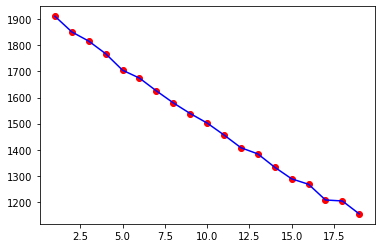

In [15]:
import matplotlib.pyplot as plt
plt.scatter(k,wcss,c='red')
plt.plot(k,wcss,c='blue')

## K-Means Clustering

In [16]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
clusters_=km.fit(A)

In [17]:
clusters_.labels_

array([3, 0, 2, ..., 3, 3, 3])

### Created DataFrame with cluster_labels and articles

In [18]:
Q1=pd.DataFrame(p_art,columns=['Articles'])
Q1['Clusters']=clusters_.labels_
Q1.head(20)

,Articles,Clusters
0,IMF WHICH PREDICT INDIA CANNOT BECOM A 5 TRIL...,3
1,SCRATCH A VIVADIT DHANCHA FIND A MANDIR A LIS...,0
2,TWO DIFFER IDEA OF INDIA BHARAT MATA KI JAI C...,2
3,AIMIM LEADER ASADUDDIN OWAISI PROVOK MUSLIM A...,4
4,SRINAGAR MAYOR HAIL AURANGZEB PRAY FOR MERCI ...,3
5,GHAZWAEHIND THE ISLAM PROPHECI THAT EXPLAIN W...,0
6,RAHUL BHAT WA ANYTH BUT A SANGHI HOW HI MURDE...,0
7,TWO DIFFER IDEA OF INDIA BHARAT MATA KI JAI C...,2
8,PHOBIA IS AN IRRAT FEAR MY FEAR IS REAL MEET...,2
9,ANDREW SYMOND A HARDHIT BATSMAN GREAT FIELDE...,0


### Creating Dictionary

In [19]:
E={0:'Cluster 1',
    1:'Cluster 2',
    2:'Cluster 3',
    3:'Cluster 4',
    4 :'Cluster 5'}

### Cluster Names to Clusters

In [20]:
R=[]
for i in Q1.Clusters:
    R.append(E[i])
Q1['Category']=R

In [21]:
Q1.head(20)

,Articles,Clusters,Category
0,IMF WHICH PREDICT INDIA CANNOT BECOM A 5 TRIL...,3,Cluster 4
1,SCRATCH A VIVADIT DHANCHA FIND A MANDIR A LIS...,0,Cluster 1
2,TWO DIFFER IDEA OF INDIA BHARAT MATA KI JAI C...,2,Cluster 3
3,AIMIM LEADER ASADUDDIN OWAISI PROVOK MUSLIM A...,4,Cluster 5
4,SRINAGAR MAYOR HAIL AURANGZEB PRAY FOR MERCI ...,3,Cluster 4
5,GHAZWAEHIND THE ISLAM PROPHECI THAT EXPLAIN W...,0,Cluster 1
6,RAHUL BHAT WA ANYTH BUT A SANGHI HOW HI MURDE...,0,Cluster 1
7,TWO DIFFER IDEA OF INDIA BHARAT MATA KI JAI C...,2,Cluster 3
8,PHOBIA IS AN IRRAT FEAR MY FEAR IS REAL MEET...,2,Cluster 3
9,ANDREW SYMOND A HARDHIT BATSMAN GREAT FIELDE...,0,Cluster 1


In [22]:
cluster1=Q1[Q1.Category=='Cluster 1'].Articles
cluster1

1        SCRATCH A VIVADIT DHANCHA FIND A MANDIR A LIS...
5        GHAZWAEHIND THE ISLAM PROPHECI THAT EXPLAIN W...
6        RAHUL BHAT WA ANYTH BUT A SANGHI HOW HI MURDE...
9        ANDREW SYMOND  A HARDHIT BATSMAN GREAT FIELDE...
12       NDTV CLAIM CONGRESS PARTI ONE FAMILI ONE TICK...
                              ...                        
1911     NDTV CLAIM CONGRESS PARTI ONE FAMILI ONE TICK...
1912     WAPO COLUMNIST AND DONAT FRAUD ACCUS RANA AYY...
1917     IS THE NEW YORK TIME COMMIT FRAUD AND KEEP SU...
1918     AMISH TRIPATHI ANNOUNC BOOK LAUNCH OF WAR OF ...
1920     SCRATCH A VIVADIT DHANCHA FIND A MANDIR A LIS...
Name: Articles, Length: 346, dtype: object